<a href="https://colab.research.google.com/github/feliciamargareta/Supervised-Learning-with-scikit-learn/blob/main/Sales_Prediction_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction with Linear Regression

In [2]:
# import library
import pandas as pd
# load data
sales_df = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Supervised-Learning-with-scikit-learn/main/advertising_and_sales_clean.csv')
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [3]:
# create feature and target variable
X = sales_df.drop(['influencer','sales'], axis = 1).values
y = sales_df['sales'].values


In [4]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

Let's predict the sales with linear regression

In [5]:
# Instantiate the model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)

## Model Evaluation
The most common metrics to evaluate linear regression model are R2 and RMSE.

In [6]:
# Compute R-squared
r_squared = reg.score(X_test,y_test)
print(f'R^2: {r_squared}')

R^2: 0.998969454469296


the features explain 99.9% of the variance in sales values! Looks like this company's advertising strategy is working well!

Evaluate the model using R^2 and RMSE

In [7]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test,y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print(f'RMSE: {rmse}')

RMSE: 2934.04934281821


it's shown that the model has an average error of sales prediction of around 2934 USD which is still relatively small compare to the sales data.

## Cross Validation
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In [8]:
# import libraries
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits = 6, shuffle = True, random_state = 21)
# reg = LinearRegression() #has been defined above
cv_results = cross_val_score(reg, X, y, cv = kf)

In [9]:
print(cv_results)

[0.99893493 0.9989921  0.99900755 0.99896841 0.99903414 0.99901662]


In [10]:
import numpy as np
# Print the mean
print(f'Avg R2: {np.mean(cv_results)}')

# Print the standard deviation
print(f'Std R2: {np.std(cv_results)}')

# Print the 95% confidence interval
print(f'lowerQ, upperQ: {np.quantile(cv_results, [0.025, 0.975])}')

Avg R2: 0.9989922902979954
Std R2: 3.275326404741869e-05
lowerQ, upperQ: [0.99893911 0.99903195]


R2= 99.89% means the feature can explain 99.89% of sales variance.

Very high R2 with very low std show a good prediction.

## Regularized Regression
We know that Linear Regression minimize a loss function by choosing the coefficient for each feature variable. Large coefficient can lead to overfitting.

To avoid overfitting, we need to apply regularization to penalize large coefficient.

Regularized Regression example:
- Ridge
- Lasso

In [11]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  # Create a Ridge regression model
  ridge = Ridge(alpha = alpha)
  # Fit the data
  ridge.fit(X_train, y_train)
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.998969454469296, 0.9989694544692966, 0.998969454469303, 0.9989694544693657, 0.998969454469993, 0.998969454476266]


The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even by heavily penalizing large coefficients, underfitting does not occur!

In [18]:
import matplotlib.pyplot as plt
# Import Lasso
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01,0.3,1,10,20,50]:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train, y_train)
  lasso_pred = lasso.predict(X_test)
  scores.append(lasso.score(X_test, y_test))
print(scores)

[0.9989694544698411, 0.9989694544856492, 0.9989694545238165, 0.998969455014453, 0.9989694555594649, 0.9989694571951023]


[ 3.56256962 -0.00397035  0.00496385]


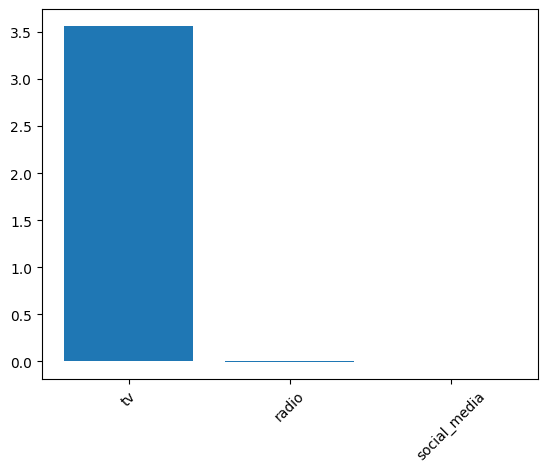

In [15]:
# Instantiate a lasso regression model
lasso = Lasso(alpha = 0.3)

# Fit the model to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

sales_columns = sales_df.drop(['influencer','sales'], axis = 1).columns
# plot the lasso coef
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

See how the figure makes it clear that expenditure on TV advertising is the most important feature in the dataset to predict sales values!